# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [75]:
install.packages("glmnet", dependencies = TRUE)
library(glmnet)
library(tidyverse)
library(ggplot2)

Warning message:
"package 'glmnet' is in use and will not be installed"


We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [2]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [3]:
# WRITE YOUR CODE HERE
#length(y)
#typeof(y)

# 1) Sample a subset of indeces; set test to be the 

train_indeces <-  sample(1:n, size = 50, replace = FALSE)

trainy = y[train_indeces]
trainx = x[train_indeces]
train = data.frame(x = trainx, y = trainy) # defines train

head(train)

test_indeces = -(train_indeces) #run on not train data

# print(train_indeces)
# print(test_indeces)

#length(y[-7])

testy = y[test_indeces]
testx = x[test_indeces]
test = data.frame(x = testx, y = testy)

head(test)

,x,y
,<dbl>,<dbl>
1,-7.56,-0.08663415
2,5.58,2.40786448
3,1.80,1.00645142
4,-0.54,2.01487369
5,-1.44,0.10934315
6,-4.86,1.08539063


,x,y
,<dbl>,<dbl>
1,-8.46,-0.5442746
2,-8.10,0.6732243
3,-7.20,1.5256458
4,-7.02,0.5469083
5,-6.84,0.9066007
6,-6.66,0.9259283


(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

[1] 50  2

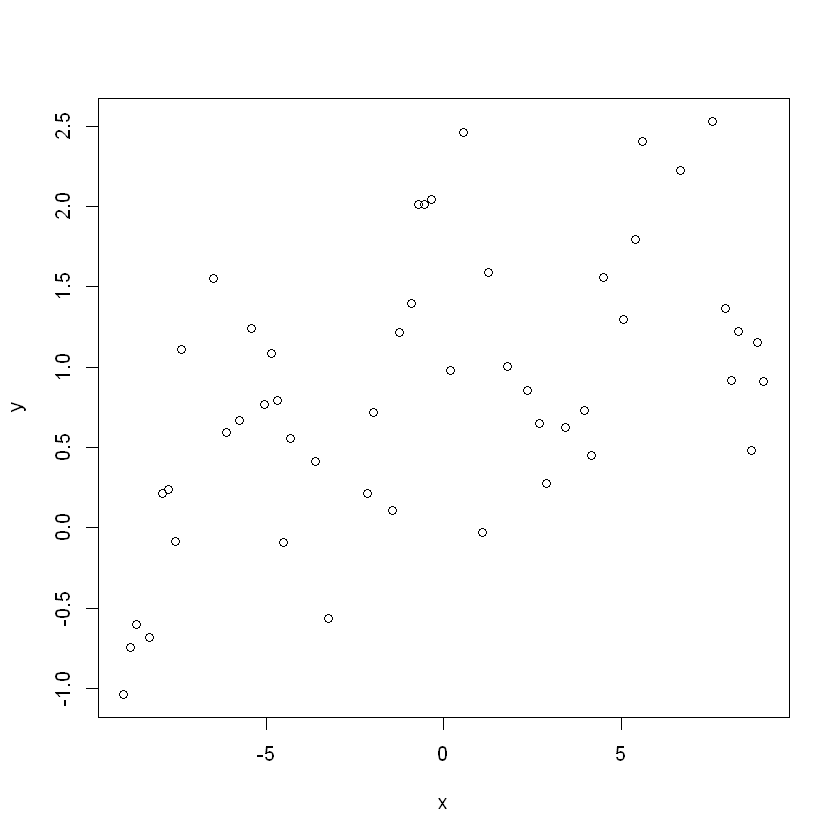

In [4]:
# WRITE YOUR CODE HERE
plot(train)
dim(train)

How would you describe the relationship between $x$ and $y$ based on this plot?

> *Medium-strong correlated, appears to be positive.*
> 

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*


Call:
lm(formula = train$y ~ poly(x, 4), data = train)

Coefficients:
(Intercept)  poly(x, 4)1  poly(x, 4)2  poly(x, 4)3  poly(x, 4)4  
      0.852        3.150       -1.619        0.627       -1.453  


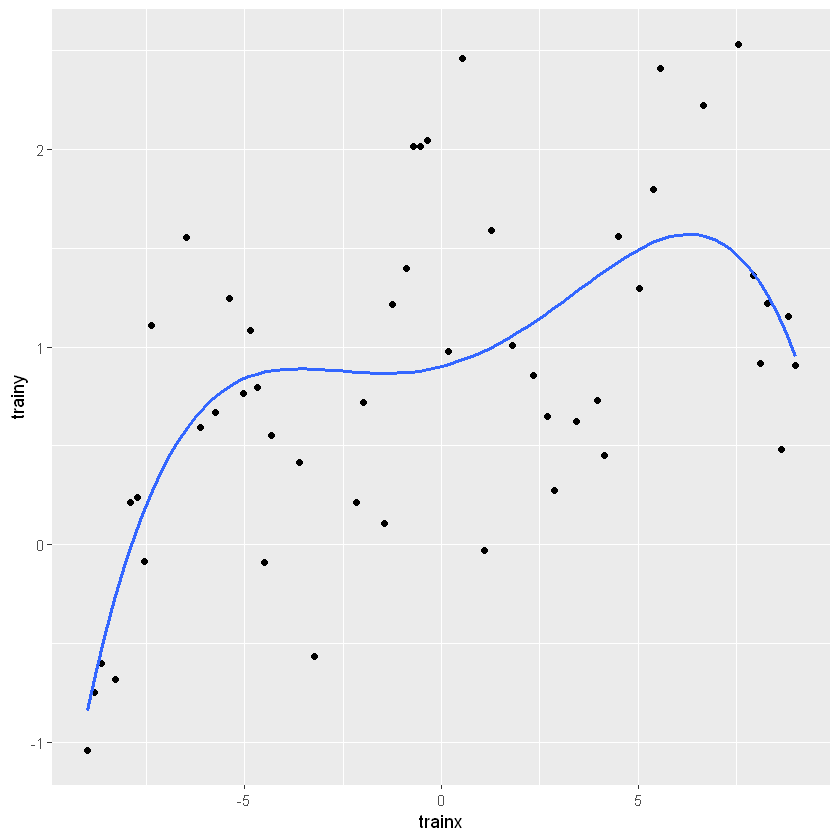

In [5]:
# WRITE YOUR CODE HERE
lm.fit = lm(train$y~poly(x,4), data=train)
lm.fit

gg  <- ggplot(train, aes(trainx, trainy))
gg + geom_point() + stat_smooth(method = "lm", formula = y ~ poly(x,4), se = FALSE)

#plot(lm.fit)

#ggplot(train(aes(x,y)))

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> *Write your response here*
> 

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?


Call:
lm(formula = train$y ~ poly(x, 12), data = train)

Coefficients:
  (Intercept)   poly(x, 12)1   poly(x, 12)2   poly(x, 12)3   poly(x, 12)4  
       0.8520         3.1503        -1.6190         0.6270        -1.4530  
 poly(x, 12)5   poly(x, 12)6   poly(x, 12)7   poly(x, 12)8   poly(x, 12)9  
      -0.1762        -1.9631         0.1982         2.6802         0.3293  
poly(x, 12)10  poly(x, 12)11  poly(x, 12)12  
      -0.6134         0.2229         0.5390  


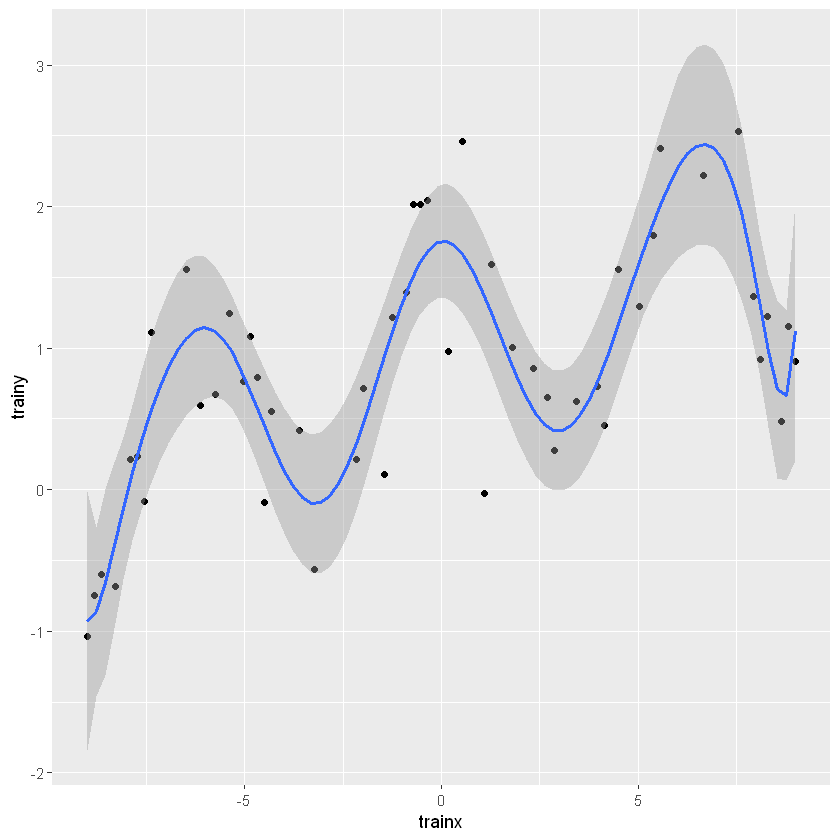

In [6]:
# WRITE YOUR CODE HERE
lm.fit = lm(train$y~poly(x,12), data=train)
lm.fit

gg  <- ggplot(train, aes(trainx, trainy))
gg + geom_point() + stat_smooth(method = "lm", formula = y ~ poly(x,12))

> Worse, it seems to be overfitting the data something awful.

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

 [1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
[26] 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[1] 50  2


0.251161232
0.186329702
0.175029690
0.181514063
0.184010890
0.165732316
0.112757859
0.085588083
0.086417369
0.091365964
0.096307185


0.5324046
0.6345179
0.4375390
0.4670082
0.3720000
0.4127740
0.1568720
0.1671801
0.1179985
0.1137178
0.1442581


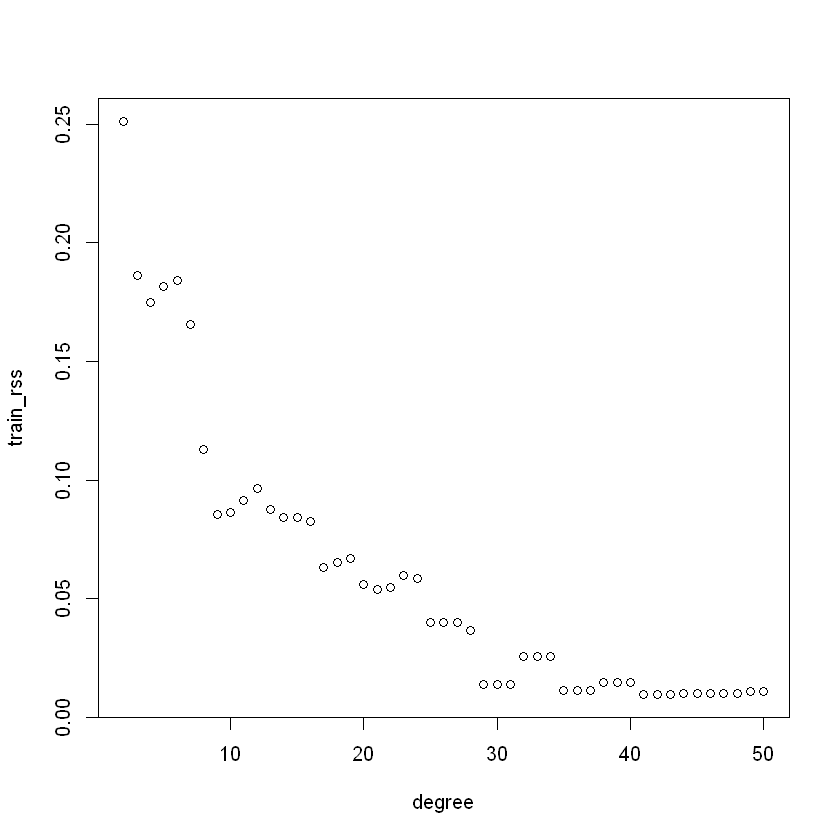

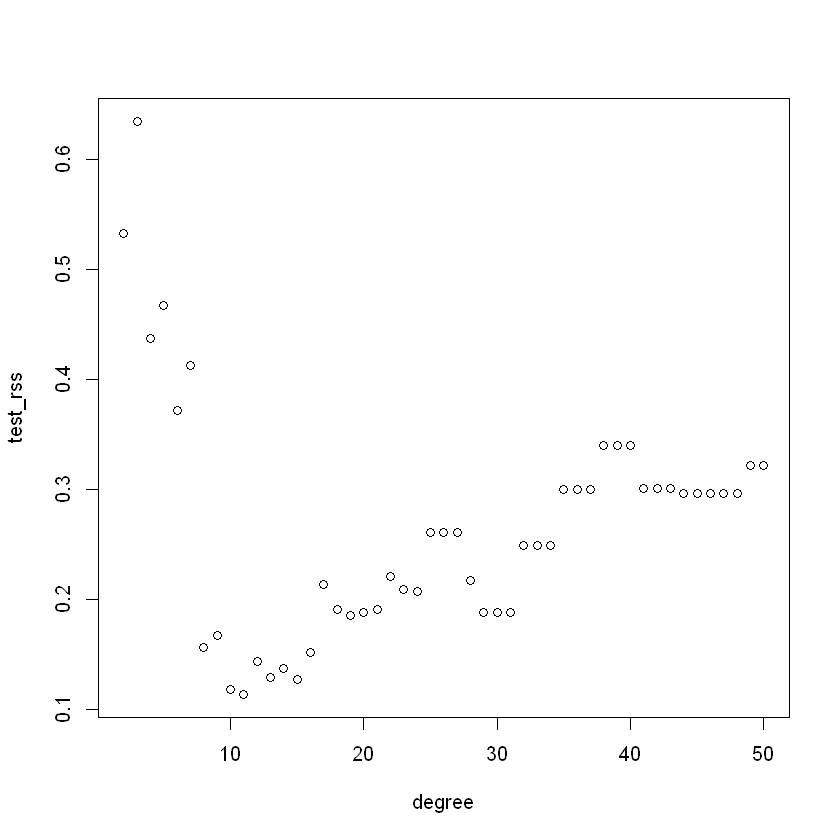

In [7]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

print(degree)

print(dim(train))

for (k in degree) {
    # WRITE YOUR CODE HERE
    
    #print(k)
    #din  <- degree[k]
    lm.fit.4 = lm(y~poly(x, k, raw = TRUE), data=train)
    #lm.fit
    sm_train  <- summary(lm.fit.4)
    mse_train <- median(sm_train$residuals^2)
    
    pred = suppressWarnings(predict(lm.fit.4, newdata = test))
    mse_test <- median((test$y-pred)^2)
    
    train_rss[k-1, 1] = mse_train
    test_rss[k-1, 1] = mse_test
    
}

train_rss
test_rss

plot(x = degree, y = train_rss)
plot(x = degree, y = test_rss)

# Plot your results here
# WRITE YOUR CODE HERE

In [8]:
?predict
fit1 = lm(train$y~poly(x,10), data=train)
attributes(fit1)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

What do you see as $k$ increase?

> *Write your response here* 
> 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



In [9]:
# WRITE YOUR CODE HERE
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

print(degree)

print(dim(train))

for (k in degree) {
    # WRITE YOUR CODE HERE
    
    #print(k)
    #din  <- degree[k]
    lm.fit.4 = lm(y~poly(x, k, raw = TRUE), data=train)
    #lm.fit
    sm_train  <- summary(lm.fit.4)
    mse_train <- median(sm_train$residuals^2)
    
    pred = suppressWarnings(predict(lm.fit.4, newdata = test))
    mse_test <- median((test$y-pred)^2)
    
    train_rss[k-1, 1] = mse_train
    test_rss[k-1, 1] = mse_test
    
}

#train_rss
#test_rss

head(train_rss)

#gg.train  <- ggplot(y = train_rss)
#gg.train + geom_point()

#plot(x = degree, y = train_rss)
#plot(x = degree, y = test_rss)

# Plot your results here
# WRITE YOUR CODE HERE


  [1]   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
 [19]  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
 [37]  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
 [55]  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
 [73]  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
 [91]  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
[109] 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
[127] 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
[145] 146 147 148 149 150
[1] 50  2


0.2511612
0.1863297
0.1750297
0.1815141
0.1840109
0.1657323


What do you see as $k$ gets larger than $n$?

> *Write your response here* 
> 

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

In [98]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

tr.x = train$x
tr.y = train$y
typeof(tr.x)
#tr.x
#poly(x, 3, raw = TRUE)
#poly(y, 3, raw = TRUE)

t.x = test$x
t.y = test$y

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    ridge.mod = glmnet(poly(tr.x, k, raw = TRUE), tr.y, alpha=0, lambda=0.00005)
    ridge_pred  <- predict(ridge.mod, s=0.00005, type="coefficients")[1:k,]
    
    mse_train  <- mean((ridge_pred - tr.y)^2) #train MSE?
    mse_test  <- mean((ridge_pred - t.y)^2) #test MSE?
    
    #print
    
    train_rss[k-1, 1] = mse_train
    test_rss[k-1, 1] = mse_test
}

# Plot your results here
# WRITE YOUR CODE HERE


[1] "double"

Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a 

Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a 

Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a 

Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - tr.y:
"longer object length is not a multiple of shorter object length"
Warning message in ridge_pred - t.y:
"longer object length is not a 

Warning message in ridge_pred - t.y:
"longer object length is not a multiple of shorter object length"


[1] 2.215158

1.092311
1.010770
1.412427
1.326422
1.251140
1.270938
1.608938
1.394848
1.509627
1.397192
1.417529


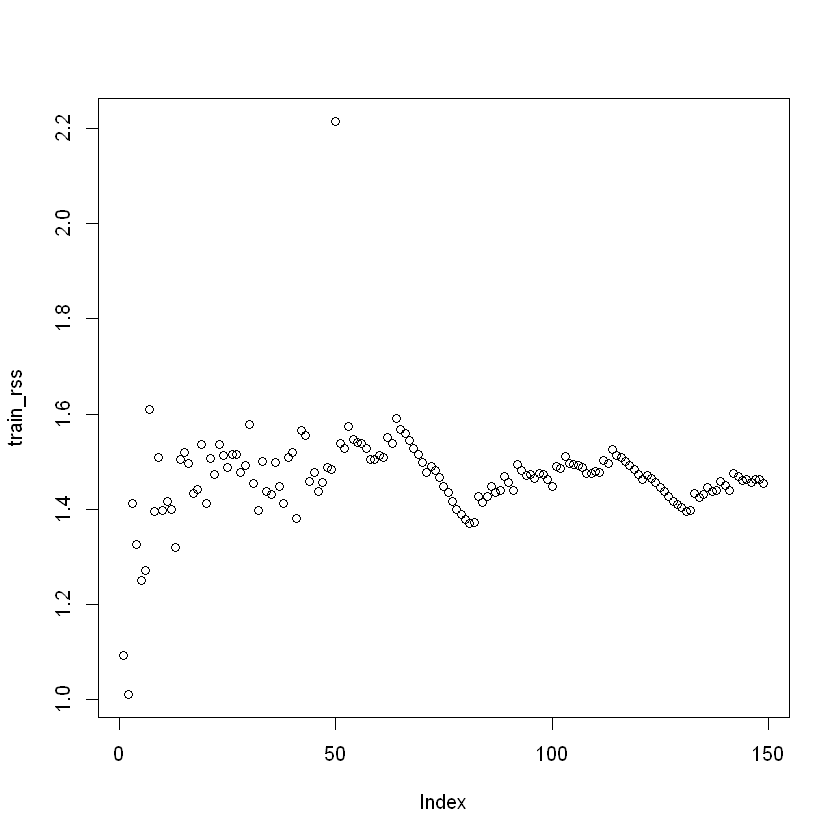

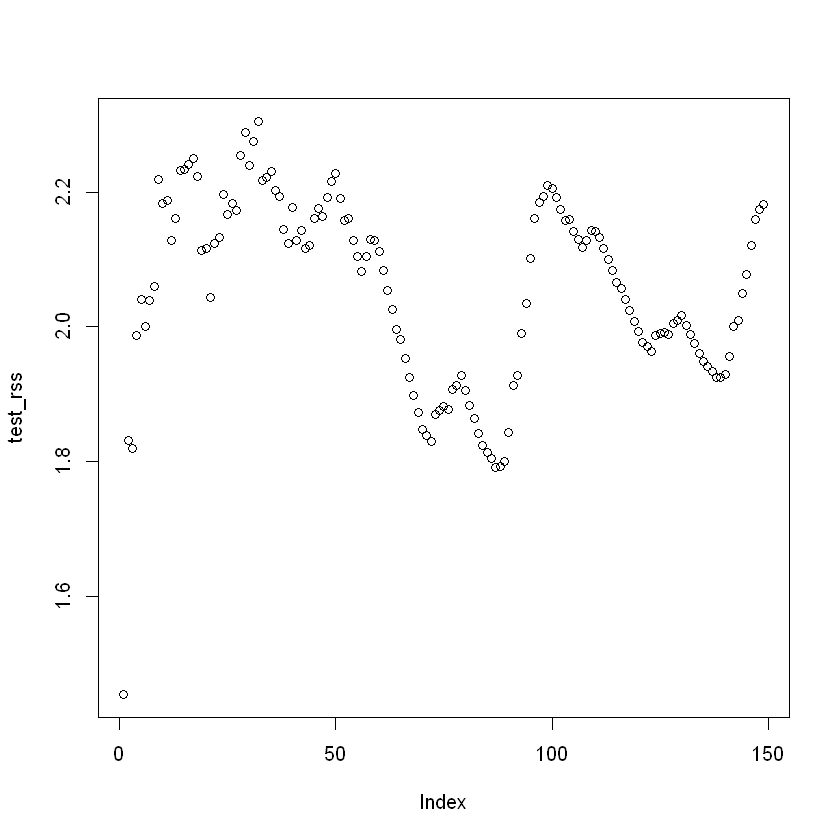

In [101]:
ridge.mod = glmnet(poly(tr.x, 50, raw = TRUE), tr.y, alpha=0, lambda=0.00005)
ridge_pred  <- predict(ridge.mod, s=0.00005, type="coefficients")[1:50,]
mean_ridge  <- mean((ridge_pred - t.y)^2)
mean_ridge
train_rss[50, 1] = mean_ridge
train_rss

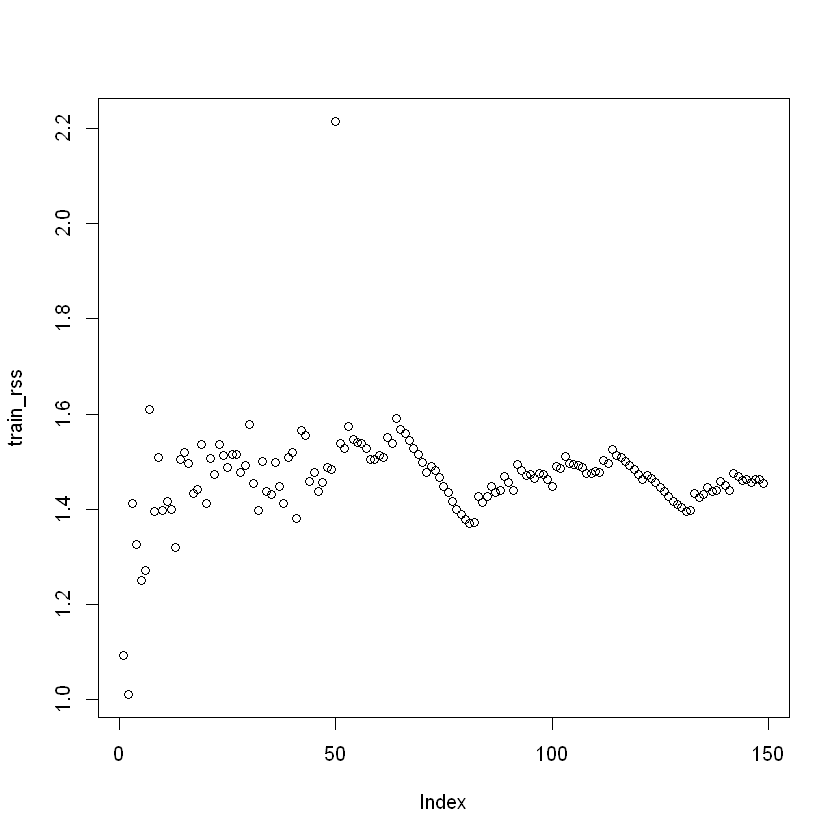

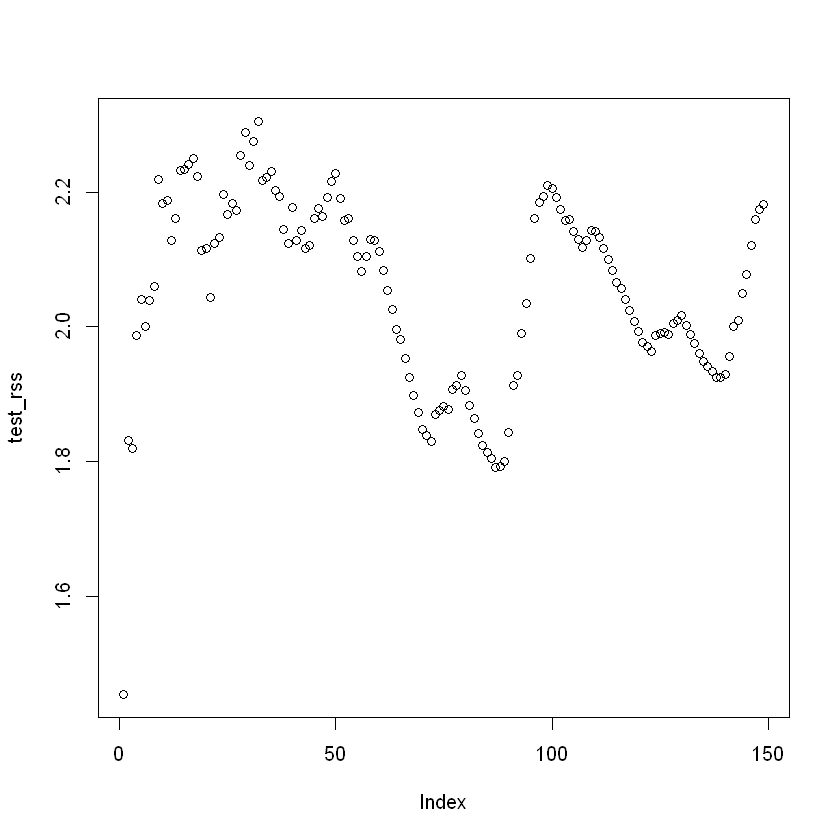

In [102]:
plot(train_rss)
plot(test_rss)

What happens now when $k$ gets larger than $n$?

> *Write your response here* 
> 

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Write your response here* 
> It's following the distribution of that particular lambda.

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here* 
> 

**DUE:** 5pm EST, April 12, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*